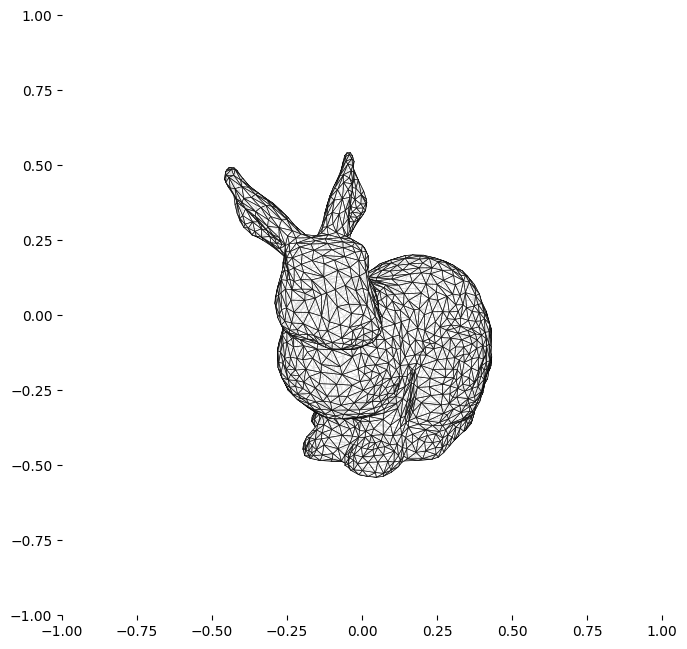

In [8]:
import meshio
import glm
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection


mesh = meshio.read("bunny.obj")
vertices, indices = mesh.points, mesh.cells[0].data

# 2. Create transform
M = glm.perspective(40, 1, 1, 100) @ glm.translate((0.1, -0.45, -2.5))
M = M @glm.xrotate(20) @ glm.yrotate(45) @ glm.scale((5,5,5))

# 3. Apply transform 
vertices = glm.to_vec3(glm.to_vec4(vertices) @ M.T)

# 4. Generate and sort faces
faces = vertices[indices]
faces = faces[np.argsort(-faces[...,2].mean(axis=1))]

# 5. Render
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1], aspect=1, frameon=False,
                  xlim=[-1,+1], ylim=[-1,+1])
ax.add_collection(
     PolyCollection(faces[...,:2], alpha=0.85, linewidth = 0.5,
                    facecolor="white", edgecolor="black"))
plt.show()
